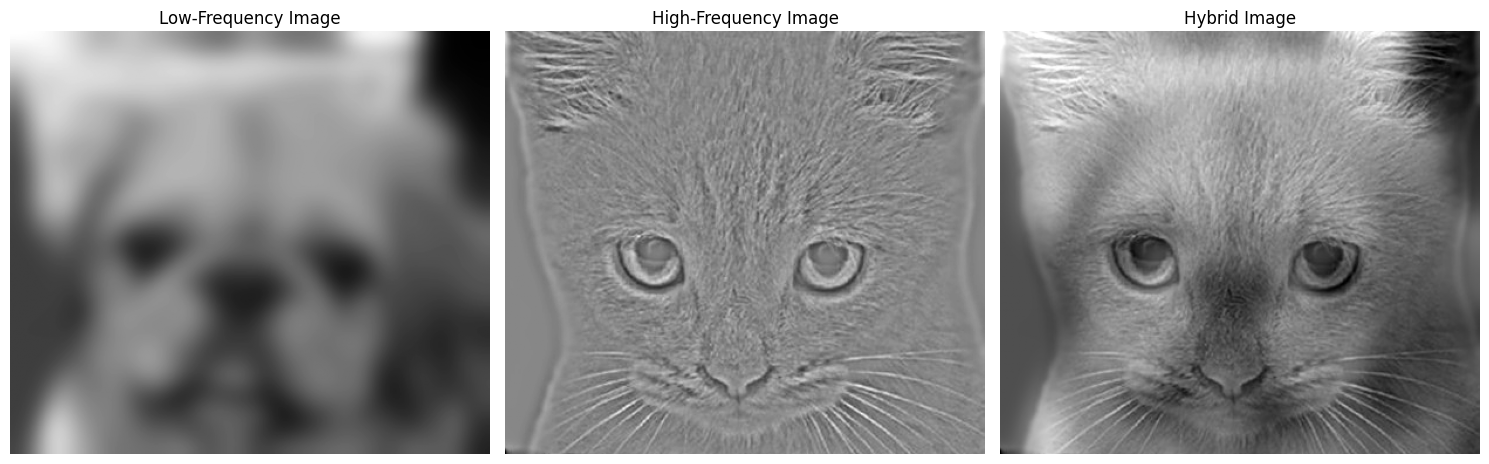

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def create_hybrid_image(image1_path, image2_path, sigma1, sigma2):
    img1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)

    if img1 is None or img2 is None:
        raise FileNotFoundError("One or both image files not found.")

    # Resize the second image to match the first one's size
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

    # Step 2: Apply a low-pass filter to the first image
    low_pass_img1 = cv2.GaussianBlur(img1.astype(float), (0, 0), sigma1)

    # Step 3: Apply a high-pass filter to the second image
    low_pass_img2 = cv2.GaussianBlur(img2.astype(float), (0, 0), sigma2)
    high_pass_img2 = img2.astype(float) - low_pass_img2

    # Step 4: Combine the two filtered images
    hybrid_image = low_pass_img1 + high_pass_img2

    # Normalize the hybrid image to the range 0-255
    hybrid_image = np.clip(hybrid_image, 0, 255).astype(np.uint8)

    high_pass_img2 = np.clip(high_pass_img2 + 128, 0, 255).astype(np.uint8)

    return low_pass_img1.astype(np.uint8), high_pass_img2, hybrid_image

def main():
    image1_path = 'Dog.jpeg' # low-frequency image
    image2_path = 'Cat.jpeg' # high-frequency image

    # Can adjust sigma values
    sigma1 = 10
    sigma2 = 5

    try:
        low_pass_img1, high_pass_img2, hybrid_img = create_hybrid_image(image1_path, image2_path, sigma1, sigma2)

        fig, axes = plt.subplots(1, 3, figsize=(15, 5))

        axes[0].imshow(low_pass_img1, cmap='gray')
        axes[0].set_title('Low-Frequency Image')
        axes[0].axis('off')

        axes[1].imshow(high_pass_img2, cmap='gray')
        axes[1].set_title('High-Frequency Image')
        axes[1].axis('off')

        axes[2].imshow(hybrid_img, cmap='gray')
        axes[2].set_title('Hybrid Image')
        axes[2].axis('off')

        plt.tight_layout()
        plt.show()

    except FileNotFoundError as e:
        print(f"Error: {e}")

if __name__ == "__main__":
    main()

